#### <p style="text-align:right";> *Geometric Methods in Machine Learning - ENSAE ParisTech - 2017/2018*</p>  <p style="text-align:right";>Samuel Ritchie - Elvire Roblin </p>

# <p style="text-align:center";><span style="color: #fb4141">Poincaré Embeddings for Learning Hierarchical Representations</span></p> 

This Jupyter Notebook aims to implement the algorithm as described in the article *Poincaré Embeddings for Learning Hierarchical Representations* (M. Nickel, D. Kiela, FAIR, 2017). It falls into two different parts : data collection, on WordNet to get hyponyms of a given word or on the LinkedJazz project (https://linkedjazz.org/) that gives connections between jazz musicians ; and the Poincare Embedding algorithm as described by the authors, implemented in Python3 with a Numpy backend. These functions can also be called via command line (be sure to have the adapted Matplotlib backend) thanks to functions in /bin.

It calls different python scripts : build_wordnet_data to collect data from Wordnet, Poincare with consists in the Poincare class implementing the algorithm of the article, and plots which contains the plotting options. The jazzmen connections network was created via another ENSAE Project (Statistical Analysis of Network Data), relative files and scripts can be found at https://github.com/SamuelRitchie/SAND.

In [1]:
from scripts import plots, Poincare, build_wordnet_data

## 1. Building datasets

In order to get the hyponyms of a given word, we first fetch all the dependencies below a word on WordNet. Here we apply it to the word "music_genre", that should gave a nice hierarchical structure beneath. Any word can be tried, the function generate_network will indicate how many vertex and links were found.

In [2]:
word = 'music_genre'

In [3]:
build_wordnet_data.get_word_dependencies(word)

fetching word 'music_genre' dependencies in WordNet...


Once the dependencies fetched, we build the network of all the relations between words. This might take a while.

In [4]:
build_wordnet_data.generate_network(word)

building network for word 'music_genre' subtree...
Builded network of 68 vertexes and 177 links for word music_genre


## 2. Implementing Poincaré Embeddings

### 2.1. WordNet Data

Once the network created, we can apply the Poincaré Embeddings as described by the authors. Please refer to scripts/Poincare.py for details of the class. It takes several initialisation parameters : the 'dataset', which is the word studied, the number of links to keep in the network (if greater than the network size, the whole network is kept), the number of epochs, the number of negative samplings per iteration (default is set to 10, see article and report for details), the learning rate (default is set to 0.1, 0.01 for the first ten epoches as suggested by the authors) and the threshold for projecting on the Poincaré ball after gradient descent (see report for details).

It generates directly a plot in two dimensions with the kept vertexes and the links between vertexes visible.

178 links kept out of 178
Running Poincaré Embeddings for dataset music_genre...


100%|██████████| 200/200 [00:36<00:00,  5.51it/s]


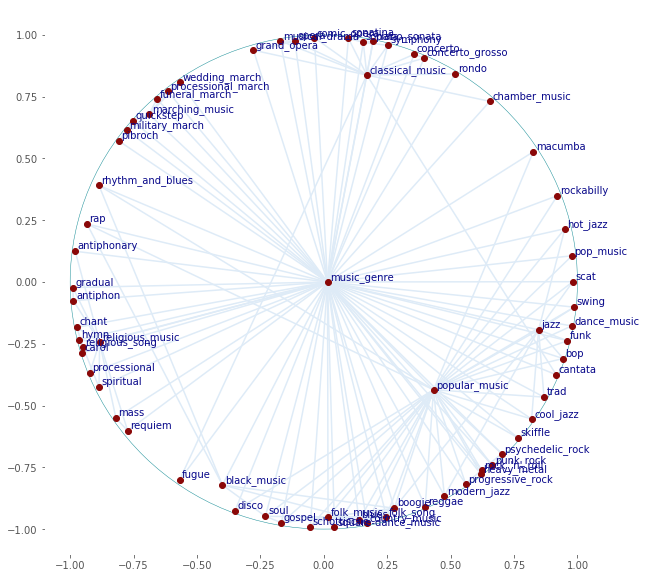

In [5]:
Poincare.Poincare_Embeddings(dataset = word, nb_epoch=200, keep=200).train_model()

### 2.2. Jazz Musician Network Data

The Jazz Musician Network DataSet was downloaded thanks to another project (https://github.com/SamuelRitchie/SAND) and can be found in data/jazzmen_network.csv in this repository.

300 links kept out of 309
Running Poincaré Embeddings for dataset jazzmen...


100%|██████████| 200/200 [01:08<00:00,  2.92it/s]


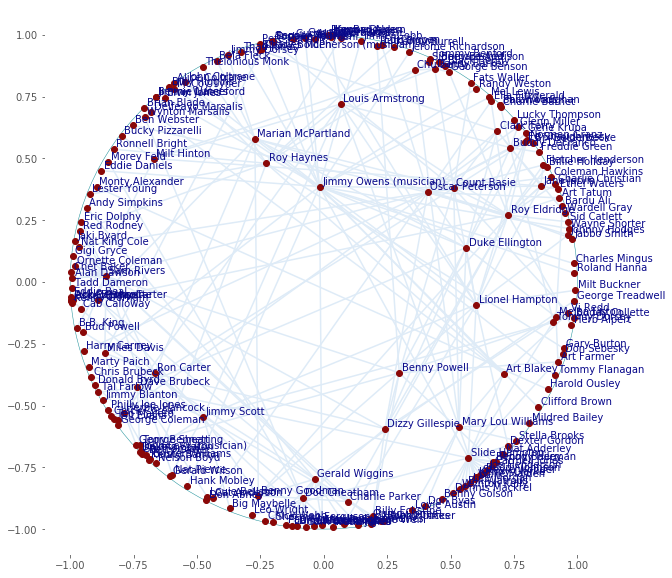

In [9]:
Poincare.Poincare_Embeddings(dataset = 'jazzmen', nb_epoch=200, keep=300).train_model()